## 📊AIRBNB DATA ANALYSIS AND FEATURE ENGINEERING

This script performs comprehensive exploratory data analysis (EDA) and feature engineering
on an Airbnb dataset. It includes data loading, cleaning, visualization and feature engineering.


# 🏢 Business Problem

The short-term rental market, particularly platforms like Airbnb, faces growing competition and fluctuating demand. Hosts often lack data-driven insights to effectively improve customer satisfaction. Without a structured understanding of what factors influence bookings, occupancy, and pricing, many listings underperform — resulting in lost revenue and poor guest experiences.

This project aims to bridge that gap by analyzing Airbnb listing data to extract actionable insights. Through exploratory data analysis (EDA) and feature engineering, we seek to understand key drivers behind successful listings and provide data-backed recommendations to optimize performance.

---

## ❗ Pain Points in the Current System

## 1. Unjustified Pricing Differences
## 2. Inconsistent Neighborhood Pricing
## 4. Reviews Not Translating to Value
## 5. Misclassification of Luxury Listings
## 6. Distance-Based Pricing Misalignment

---

## ✅ How This Project Addresses the Issues

- 🔧 **Feature Engineering:** Converts unstructured and raw features into meaningful variables that influence pricing and occupancy .
- 🧼 **Data Cleaning:** Handles missing values and inconsistencies to ensure accurate insights.
- 📈 **Exploratory Data Analysis:** Visualizations help identify patterns in listing specific(eg. number of bedrooms), price distribution, and neighbourhood preferences.
- 🗺️ **Location-Based Insights:** Uses pricing geographically to spot high-performing neighborhoods.

By applying these techniques, this project empowers Airbnb hosts, analysts, and platform managers to make smarter, data-informed decisions.


## 📊 WHY I CHOSE THIS DATASET:

I chose the Airbnb dataset because it offers rich, real-world information across multiple dimensions such as pricing, location, availability, and user reviews, making it ideal for practical data analysis. It allows me to explore meaningful patterns and apply feature engineering techniques to gain insights. Additionally, the dataset includes both structured and unstructured features, providing an excellent opportunity to enhance data preprocessing and visualization skills. Its relevance to the travel and hospitality industry also makes the insights highly applicable and valuable in real-life scenarios.


LIBRARY IMPORTS

Essential libraries loaded for data analysis and visualization

pandas for data manipulation, numpy for numerical operations, matplotlib/seaborn for visualization


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

DATA LOADING AND INITIAL EXPLORATION


In [4]:
df=pd.read_csv(r"C:\ENDURE WORK\EDA AND FEATURE ENGINEERING\USECASE 2\DATA\datasets.csv",encoding_errors='ignore')

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [6]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
20765,2.473690e+07,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,29/09/23,1.81,1.0,157.0,12.0,No License,4.75,1,1,1
20766,2.835711e+06,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,01/07/23,0.48,1.0,0.0,1.0,No License,4.46,1,2,1
20767,5.182527e+07,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,08/12/23,2.09,1.0,0.0,27.0,No License,4.93,1,1,1
20768,7.830000e+17,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,17/09/23,0.91,1.0,363.0,7.0,No License,5,1,1,1
20769,5.660000e+17,Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...,93827372,Glenroy,Queens,Rosedale,40.658874,-73.728651,Private room,102.0,...,10/12/23,4.50,1.0,0.0,62.0,OSE-STRREG-0000513,4.89,1,1,1


DATASET DIMENSIONS AND BASIC INFO

In [7]:
#Checking for total size ,shape and dimensions
total_size=df.size
print(f'The total size of the dataset is {total_size}')

total_shape=df.shape
print(f'The total number of rows in the dataset is {total_shape[0]}')
print(f'The total number of columns in the dataset is {total_shape[1]}')


dimensions=df.ndim
print(f'The total number of dimensions is {dimensions}')


The total size of the dataset is 456940
The total number of rows in the dataset is 20770
The total number of columns in the dataset is 22
The total number of dimensions is 2


In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


UNIQUE VALUES ANALYSIS

In [11]:

for col in df.columns:
    uni=df[col].nunique()
    print(f'{col} has {uni} unique values')

id has 13203 unique values
name has 9836 unique values
host_id has 12449 unique values
host_name has 5815 unique values
neighbourhood_group has 5 unique values
neighbourhood has 221 unique values
latitude has 15375 unique values
longitude has 14468 unique values
room_type has 4 unique values
price has 784 unique values
minimum_nights has 69 unique values
number_of_reviews has 469 unique values
last_review has 1878 unique values
reviews_per_month has 783 unique values
calculated_host_listings_count has 68 unique values
availability_365 has 366 unique values
number_of_reviews_ltm has 153 unique values
license has 879 unique values
rating has 162 unique values
bedrooms has 12 unique values
beds has 17 unique values
baths has 17 unique values


DATA TYPE CONVERSION

In [12]:
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')

In [13]:
df['baths'] = pd.to_numeric(df['baths'], errors='coerce')


In [14]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


Converting mixed-type columns to proper numerical format
This ensures mathematical operations work correctly and prevents type-related errors


NULL VALUES DETECTION

In [15]:
null_cols_names=df.columns[df.isnull().any()]
null_cols_names

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'rating', 'bedrooms',
       'baths'],
      dtype='object')

DUPLICATE VALUES ANALYSIS

In [16]:
total_duplicated_values=df.duplicated().sum()
total_duplicated_values


np.int64(12)

In [17]:
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
6,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2.0,1,1.0
7,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1.0,2,1.0
8,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1.0,1,1.0
9,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,NaN,1,1.0
10,4.958498e+07,Rental unit in New York · ★5.0 · 1 bedroom · 1...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115.0,...,29/07/23,0.16,139.0,276.0,2.0,No License,5.00,1.0,1,1.0
20736,7.990000e+17,Rental unit in New York · 2 bedrooms · 2 beds ...,224733902,CozySuites Copake,Manhattan,Upper East Side,40.768970,-73.957592,Entire home/apt,153.0,...,15/09/23,0.41,8.0,308.0,2.0,No License,NaN,2.0,2,2.0
20737,5.930000e+17,Rental unit in New York · ★4.79 · 2 bedrooms ·...,23219783,Rob,Manhattan,West Village,40.730220,-74.002910,Entire home/apt,175.0,...,22/11/23,2.03,4.0,129.0,25.0,No License,4.79,2.0,2,1.0
20738,9.230000e+17,Loft in New York · ★4.33 · 1 bedroom · 2 beds ...,520265731,Rodrigo,Manhattan,Greenwich Village,40.728390,-73.999540,Entire home/apt,156.0,...,02/01/24,2.60,1.0,356.0,9.0,Exempt,4.33,1.0,2,1.0
20739,1.336161e+07,Rental unit in New York · ★4.89 · 2 bedrooms ·...,8961407,Jamie,Manhattan,Harlem,40.805700,-73.946250,Entire home/apt,397.0,...,08/09/23,1.08,3.0,274.0,3.0,No License,4.89,2.0,2,1.0
20740,5.119566e+07,Rental unit in New York · Studio · 1 bed · 1 bath,51501835,Jeniffer,Manhattan,Chinatown,40.718360,-73.995850,Entire home/apt,100.0,...,25/05/23,0.08,139.0,306.0,1.0,No License,NaN,NaN,1,1.0


Some entries appeared as duplicates based on the host name and host details. However, these were not true duplicates; they represented different property listings managed by the same host. 

COLUMN TYPE SEPARATION

Clear distinction between categorical and numerical features enables targeted analysis

Understanding data types is crucial for selecting appropriate preprocessing techniques


In [18]:
cat_col=df.select_dtypes(include='object').columns
cat_col

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review', 'license'],
      dtype='object')

In [19]:
numeric_col=df.select_dtypes(exclude='object').columns
numeric_col

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'rating', 'bedrooms', 'beds', 'baths'],
      dtype='object')

DISTRIBUTION ANALYSIS - NUMERIC COLUMNS


In [20]:
df[numeric_col].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,beds,baths
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,17016.000000,18953.000000,20770.000000,20757.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,4.734206,1.431911,1.723592,1.177940
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,0.294373,0.814935,1.211993,0.480369
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.750000,1.000000,1.000000,0.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,4.640000,1.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,4.810000,1.000000,1.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,4.930000,2.000000,2.000000,1.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,5.000000,15.000000,42.000000,15.500000


In [21]:
df['price'].isnull().sum()

np.int64(34)

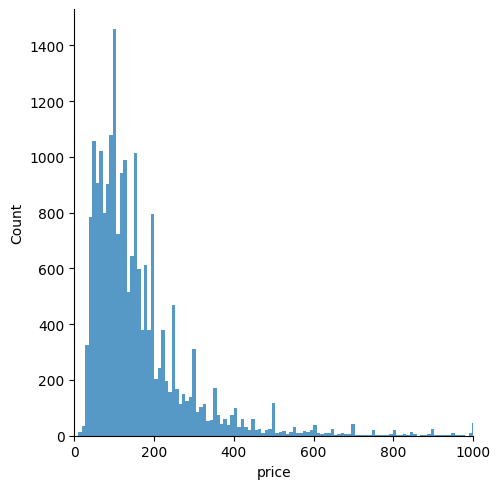

In [22]:
sns.displot(df['price'])
plt.xlim(0, 1000)

plt.show()

The price column in the dataset is right-skewed, with most properties priced at lower ranges and a long tail of higher-priced listings.

In [23]:
df['minimum_nights'].isnull().sum()

np.int64(7)

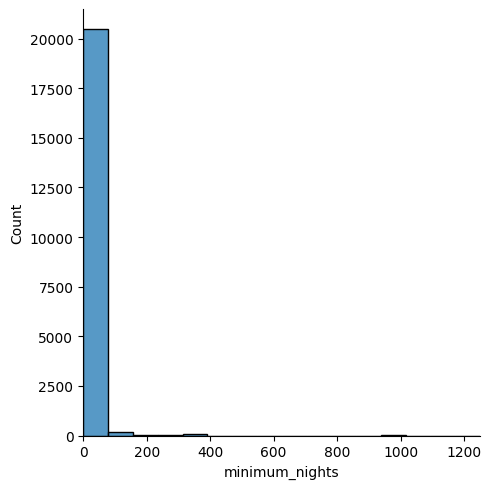

In [24]:
sns.displot(df['minimum_nights'])
plt.xlim(0, 1250)

plt.show()

The minimum_nights column in the dataset is right-skewed, with most data points at lower ranges and few data points on the right tail.

In [25]:
df['reviews_per_month'].isnull().sum()

np.int64(7)

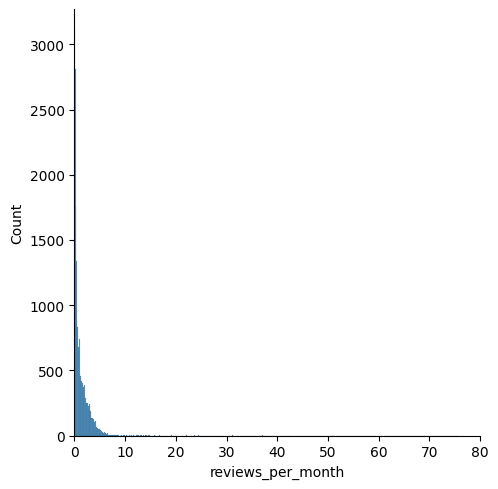

In [26]:
sns.displot(df['reviews_per_month'])
plt.xlim(0, 80)

plt.show()

The reviews_per_month column in the dataset is right-skewed, with most data points at lower ranges and and few data points on the right tail.

In [27]:
df['calculated_host_listings_count'].isnull().sum()

np.int64(7)

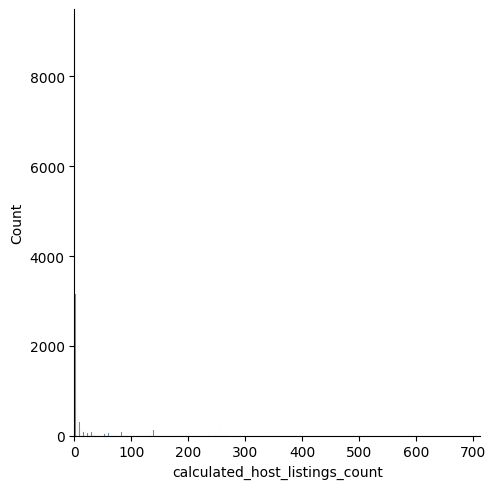

In [28]:
sns.displot(df['calculated_host_listings_count'])
plt.xlim(0, 713)

plt.show()

The calculated_host_listings_count column in the dataset is right-skewed, with most data points at lower ranges and and few data points on the right tail.

In [29]:
df['availability_365'].isnull().sum()

np.int64(7)

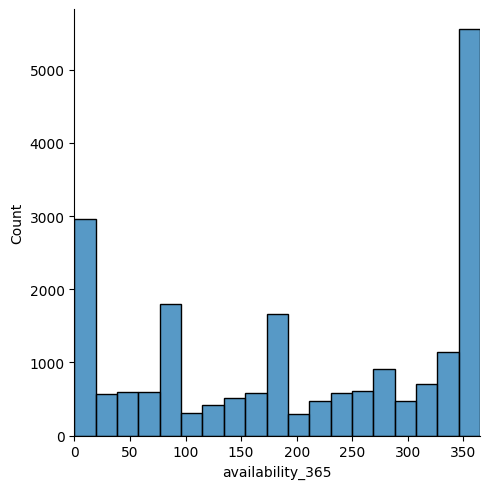

In [30]:
sns.displot(df['availability_365'])
plt.xlim(0, 365)

plt.show()

The availability_365 column exhibits a multimodal distribution with significant peaks at 0 and 365 days. This indicates that a large number of listings are either completely unavailable or fully available throughout the year.

In [31]:
df['number_of_reviews_ltm'].isnull().sum()

np.int64(7)

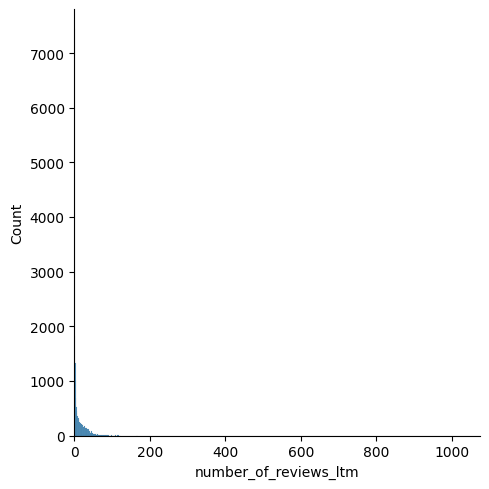

In [32]:
sns.displot(df['number_of_reviews_ltm'])
plt.xlim(0, 1075)

plt.show()

The number_of_reviews_ltm column in the dataset is right-skewed, with most data points at lower ranges and few data points on the right tail.

In [33]:
df['bedrooms'].isnull().sum()

np.int64(1817)

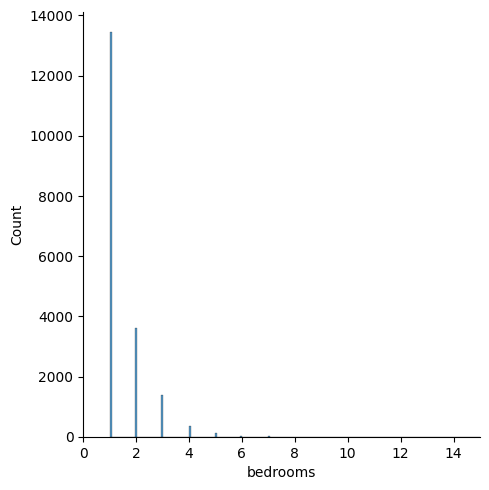

In [34]:
sns.displot(df['bedrooms'])
plt.xlim(0, 15)

plt.show()

The bedrooms column in the dataset is right-skewed, with most data points at lower ranges and few data points on the right tail.

In [35]:
df['beds'].isnull().sum()

np.int64(0)

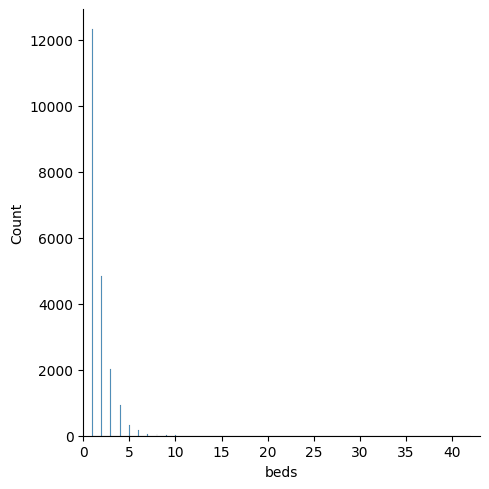

In [36]:
sns.displot(df['beds'])
plt.xlim(0, 43)


plt.show()

The beds column in the dataset is right-skewed, with most data points at lower ranges and few data points on the right tail.

In [37]:
df['baths'].isnull().sum()

np.int64(13)

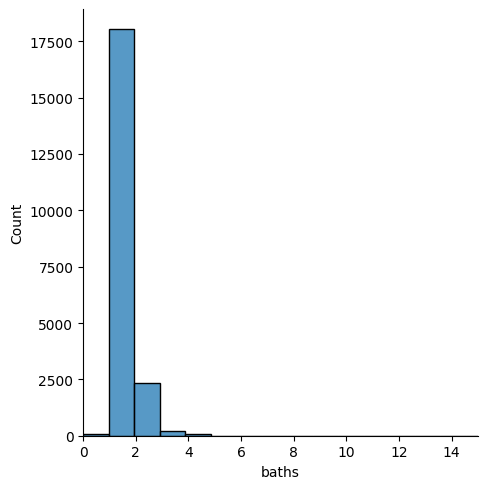

In [38]:
sns.displot(df['baths'])
plt.xlim(0, 15)


plt.show()

The baths column in the dataset is right-skewed, with most data points at lower ranges and few data points on the right tail.

CATEGORICAL DATA ANALYSIS

In [39]:
#Finding unique values per column
for col in cat_col:
    unique_cat_values=df[col].nunique()
    print(f'{col} has {unique_cat_values} unique values')

name has 9836 unique values
host_name has 5815 unique values
neighbourhood_group has 5 unique values
neighbourhood has 221 unique values
room_type has 4 unique values
last_review has 1878 unique values
license has 879 unique values


ANALYSIS OF THE NAME COLUMN

In [40]:
df['name'].isnull().sum()

np.int64(0)

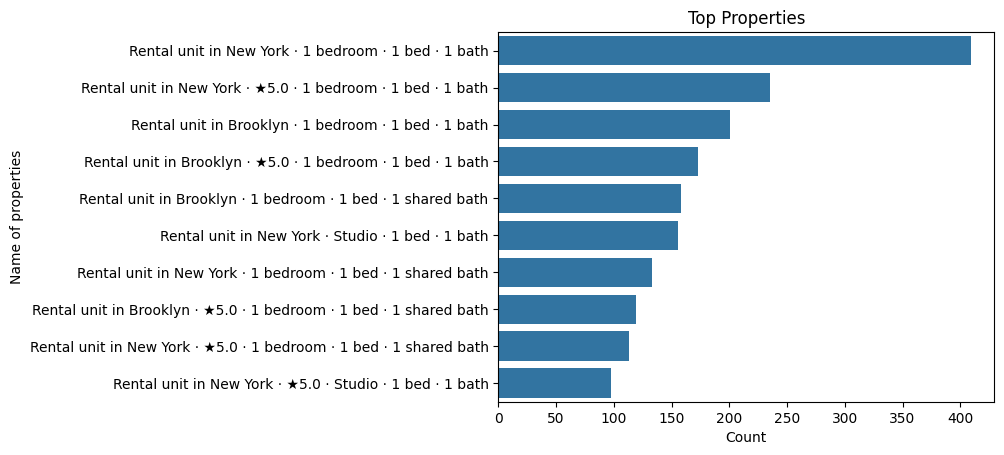

In [41]:
top_properties = df['name'].value_counts().nlargest(10)

sns.barplot(x=top_properties.values, y=top_properties.index)
plt.title("Top Properties")
plt.xlabel("Count")
plt.ylabel("Name of properties")
plt.show()


ANALYSIS OF THE HOST NAME COLUMN

In [42]:
df['host_name'].isnull().sum()

np.int64(0)

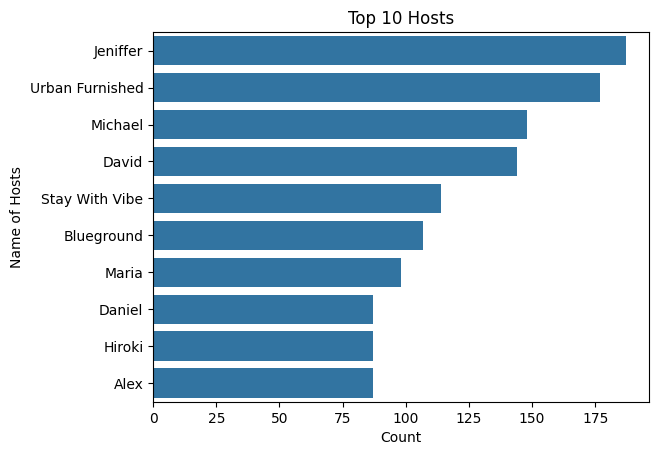

In [43]:
top_hosts = df['host_name'].value_counts().nlargest(10)

sns.barplot(x=top_hosts.values, y=top_hosts.index)
plt.title("Top 10 Hosts")
plt.xlabel("Count")
plt.ylabel("Name of Hosts")
plt.show()


ANALYSIS OF THE NEIGHBOURHOOD GROUP COLUMN

In [44]:
df['neighbourhood_group'].isnull().sum()

np.int64(0)

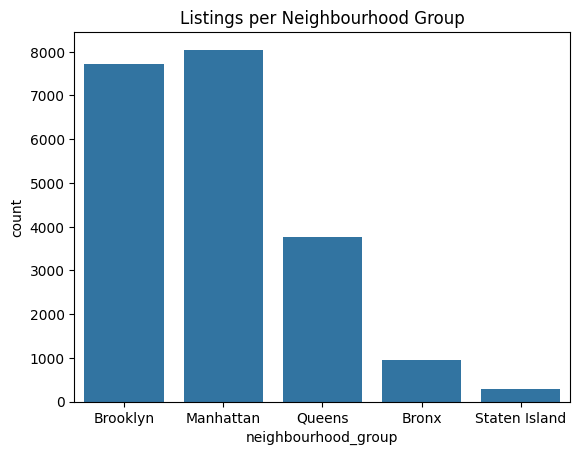

In [45]:
sns.countplot(data=df, x='neighbourhood_group')
plt.title("Listings per Neighbourhood Group")
plt.show()


ANALYSIS OF THE ROOM TYPE COLUMN

In [46]:
df['room_type'].isnull().sum()

np.int64(7)

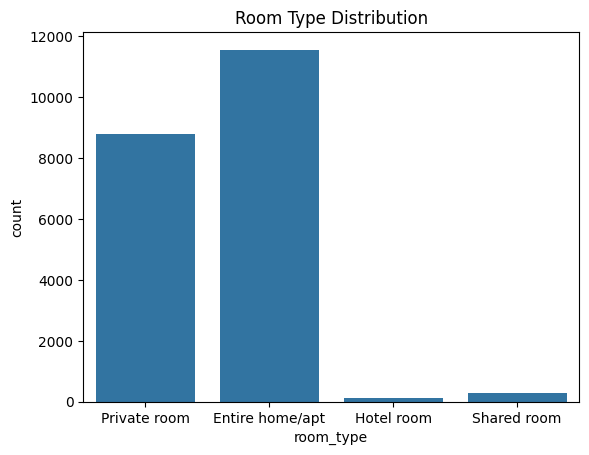

In [47]:
sns.countplot(data=df, x='room_type')
plt.title("Room Type Distribution")
plt.show()


ANALYSIS OF THE NEIGHBOURHOOD COLUMN

In [48]:
df['neighbourhood'].isnull().sum()

np.int64(7)

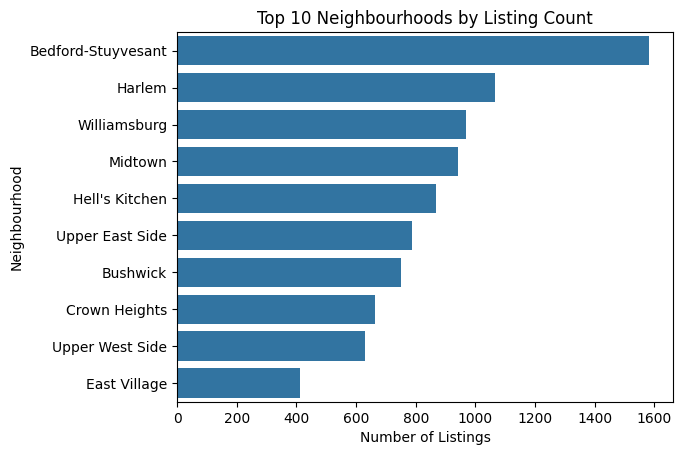

In [49]:
# Show top 10 neighbourhoods by count
top_nbh = df['neighbourhood'].value_counts().nlargest(10)

sns.barplot(x=top_nbh.values, y=top_nbh.index)
plt.title("Top 10 Neighbourhoods by Listing Count")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood")
plt.show()


ANALYSIS OF THE LICENSE COLUMN

In [50]:

df['license'].isnull().sum()

np.int64(0)

In [51]:
df['license'].value_counts()

license
No License            17579
Exempt                 2137
OSE-STRREG-0000068       14
OSE-STRREG-0008664        6
OSE-STRREG-0000437        6
                      ...  
OSE-STRREG-0000005        1
OSE-STRREG-0000445        1
OSE-STRREG-0001081        1
OSE-STRREG-0000600        1
OSE-STRREG-0000942        1
Name: count, Length: 879, dtype: int64

In [52]:
top_license_used=df['license'].value_counts().nlargest(10)

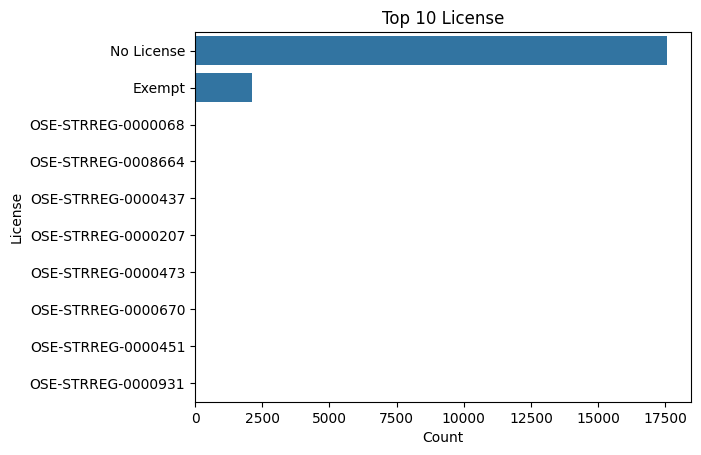

In [53]:
sns.barplot(x=top_license_used.values, y=top_license_used.index)
plt.title("Top 10 License")
plt.xlabel("Count")
plt.ylabel("License")
plt.show()

ANALYSIS OF THE RATING COLUMN

In [54]:
df['rating'].isnull().sum()

np.int64(3754)

In [55]:
df['rating'].value_counts()

rating
5.00    2883
4.67     518
4.75     469
4.80     439
4.83     426
        ... 
3.58       1
3.77       1
3.65       1
3.87       1
2.75       1
Name: count, Length: 160, dtype: int64

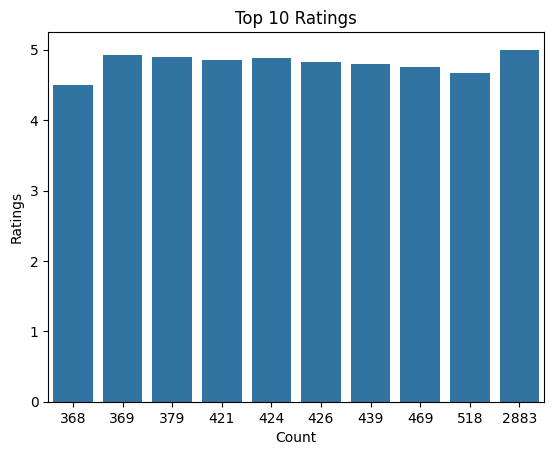

In [56]:
# Show top 10 neighbourhoods by count
top_rating = df['rating'].value_counts().nlargest(10)

sns.barplot(x=top_rating.values, y=top_rating.index)
plt.title("Top 10 Ratings")
plt.xlabel("Count")
plt.ylabel("Ratings")
plt.show()


## BIVARIATE ANALYSIS

## 1. Room Type vs Average Price

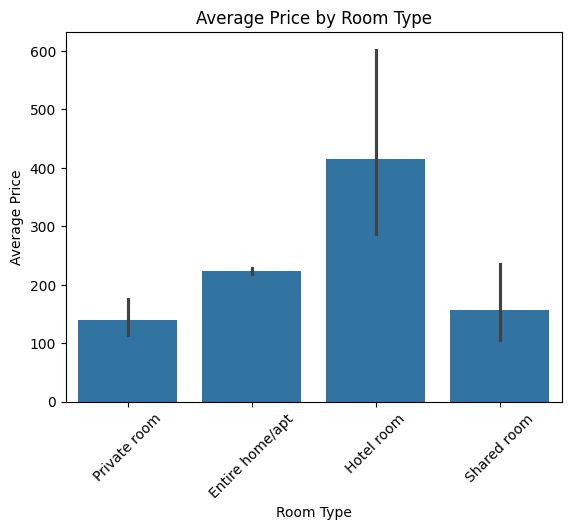

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt

# Average price by room type
sns.barplot(x='room_type', y='price', data=df)
plt.title('Average Price by Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.show()


## ✅ Business Question:
How does average pricing differ across various room types on Airbnb?

## 📊 Insight:
Private rooms and shared rooms have significantly lower average prices compared to entire home/apartment listings. Hotel room command the highest prices.

## 🛠️ Action Airbnb Can Take:
- Promote **Hotel room listing** as premium/luxury experiences.
- Offer discount incentives or bundles for **Hotel  rooms** to attract budget travelers.
- Encourage new hosts to offer **entire homes** in high-demand locations to increase revenue.


## 2. Neighbourhood Group vs Average Price

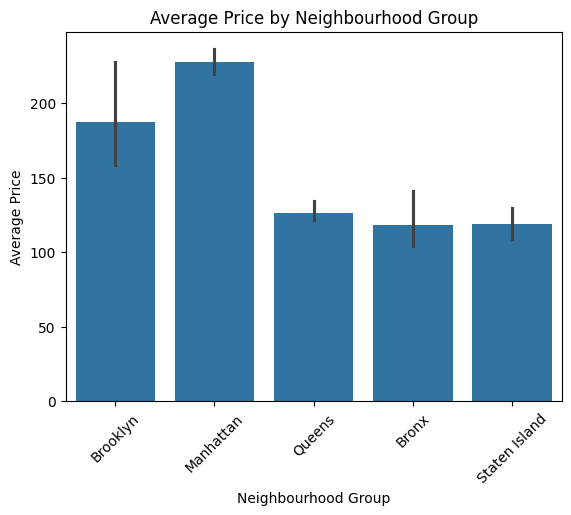

In [132]:
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.title('Average Price by Neighbourhood Group')
plt.ylabel('Average Price')
plt.xlabel('Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()


## ✅ Business Question:
Which neighbourhood groups have the highest and lowest average Airbnb prices?

## 📊 Insight:
Neighbourhoods like Manhattan have the highest average prices, while areas like Bronx or Staten Island are relatively affordable.

## 🛠️ Action Airbnb Can Take:
- Guide luxury-focused customers to **Manhattan** listings.
- Increase visibility of **affordable listings** in less expensive neighbourhoods for budget travelers.
- Provide **localized pricing suggestions** for new hosts based on the neighbourhood group.


## 3. Availability vs Room Type

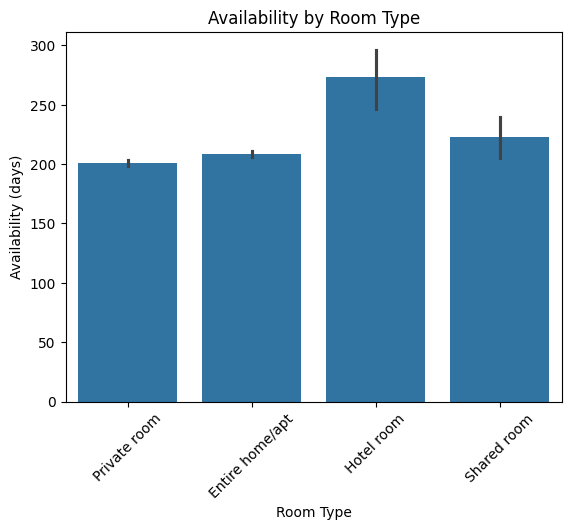

In [126]:
sns.barplot(data=df, x='room_type', y='availability_365')
plt.title('Availability by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Availability (days)')
plt.xticks(rotation=45)
plt.show()


## ✅ Business Question:
How does availability vary across different room types?

## 📊 Insight:
Private rooms tend to have **lower availability**, possibly due to owner-occupancy, while Hotel/shared rooms show higher availability.

## 🛠️ Action Airbnb Can Take:
- Help hosts of entire homes **improve availability** with dynamic scheduling tools.
- Offer **priority search placement** for room types with higher availability.
- Encourage flexible hosting models to **maximize occupancy** across room types.


## 4. Price vs Number of Reviews

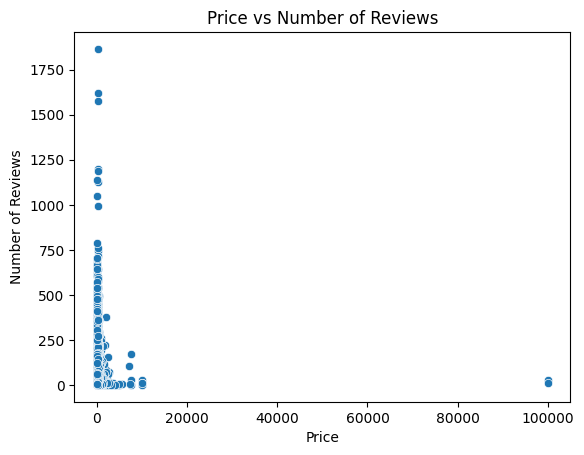

In [127]:
sns.scatterplot(data=df, x='price', y='number_of_reviews')
plt.title('Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()


## ✅ Business Question:
What is the relationship between price and number of reviews?

## 📊 Insight:
Listings with **lower to mid-range prices** tend to have more reviews, indicating higher booking frequency. Luxury listings receive fewer reviews, possibly due to niche audience.

## 🛠️ Action Airbnb Can Take:
- Promote **affordable listings** with strong reviews for wider audience appeal.
- Feature luxury listings with **enhanced visuals and testimonials** to boost confidence.
- Use review count to **identify popular and trusted hosts** for top placement.


## 5. Luxury Listing vs Price

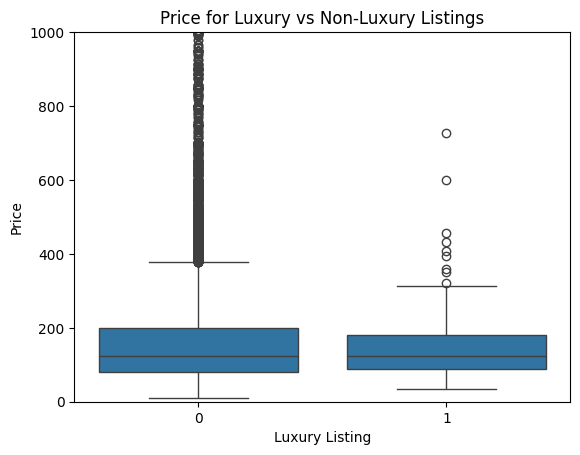

In [130]:
sns.boxplot(data=new_encoded_bnb_data, x='is_luxury', y='price')
plt.title('Price for Luxury vs Non-Luxury Listings')
plt.xlabel('Luxury Listing')
plt.ylabel('Price')
plt.ylim(0,1000)
plt.show()


## ✅ Business Question:
How are luxury listings priced compared to regular listings?

## 📊 Insight:
Luxury listings are priced significantly higher, often exceeding the average market range.

## 🛠️ Action Airbnb Can Take:
- Create a **premium category filter** to easily identify luxury stays.
- Offer luxury hosts access to **Airbnb Luxe branding and premium support**.
- Provide **exclusive perks** to customers booking luxury stays to enhance loyalty.


## 6. Price vs Distance from City Center

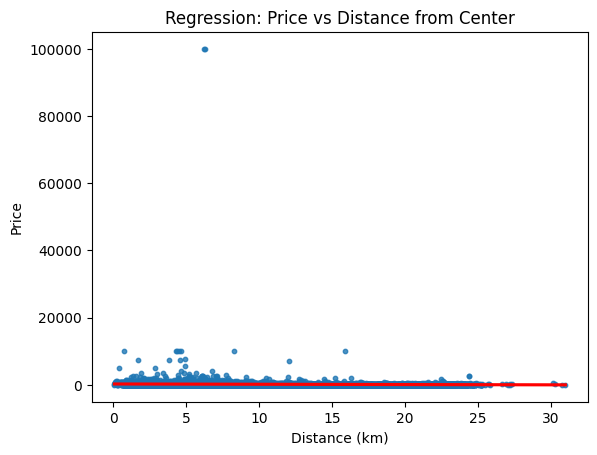

In [133]:
sns.regplot(x='dist_from_center', y='price', data=df, scatter_kws={"s":10}, line_kws={"color":"red"})
plt.title('Regression: Price vs Distance from Center')
plt.xlabel('Distance (km)')
plt.ylabel('Price')
plt.show()


## ✅ Business Question:
How does the price of listings vary with distance from the city center?

## 📊 Insight:
Listings **closer to the city center** are more expensive, while prices drop as distance increases.

## 🛠️ Action Airbnb Can Take:
- Use this trend to create **price filters tied to location**, helping travelers budget better.
- Suggest **transportation options** for remote listings to boost appeal.
- Guide hosts to **adjust pricing** based on proximity to central attractions.


## 7. Bedroom Category vs Price

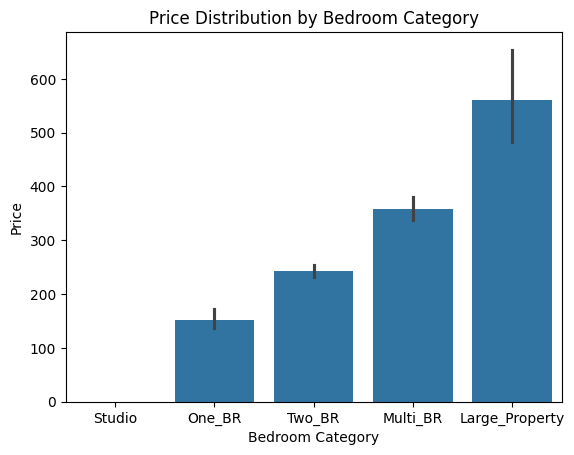

In [137]:
sns.barplot(x='bedroom_category', y='price', data=new_encoded_bnb_data)
plt.title('Price Distribution by Bedroom Category')
plt.xlabel('Bedroom Category')
plt.ylabel('Price')
plt.show()


## ✅ Business Question:
How does the number of bedrooms impact average price?

## 📊 Insight:
As the number of bedrooms increases, the average price also increases, especially for listings with more than 2 bedrooms.

## 🛠️ Action Airbnb Can Take:
- Help hosts with multiple-bedroom properties **optimize pricing** with demand trends.
- Promote **multi-bedroom listings** for families and group travel.
- Offer **room-by-room pricing tools** to increase competitiveness for larger listings.


NULL VALUE HANDLING PREPARATION


In [57]:
null_cols_names.nunique()

15

In [58]:
num_null_cols= [i  for i in null_cols_names if i in numeric_col]

In [59]:
num_null_cols

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'rating',
 'bedrooms',
 'baths']

In [60]:
cat_null_cols= [i  for i in null_cols_names if i in cat_col]

In [61]:
cat_null_cols

['neighbourhood', 'room_type', 'last_review']

NULL VALUE IMPUTATION

In [62]:
for col in num_null_cols:
    df[col] = df[col].apply(lambda x: x[0] if isinstance(x, (list, np.ndarray)) else x)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].fillna(df[col].median())


Median imputation preserves distribution shape for numerical features.

In [63]:
for col in cat_null_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

Mode imputation maintains categorical distribution patterns

In [64]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

OUTLIER DETECTION AND VISUALIZATION


In [65]:
numeric_col

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'rating', 'bedrooms', 'beds', 'baths'],
      dtype='object')

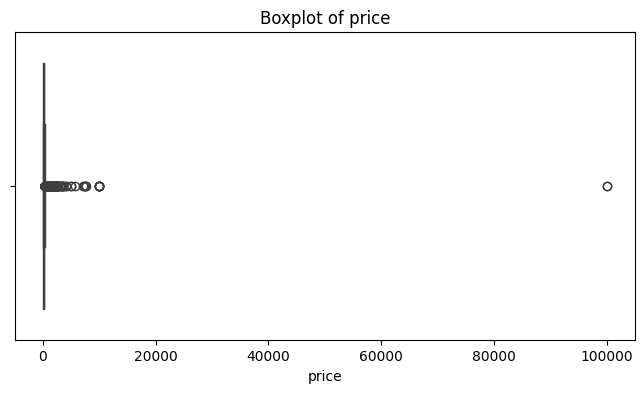

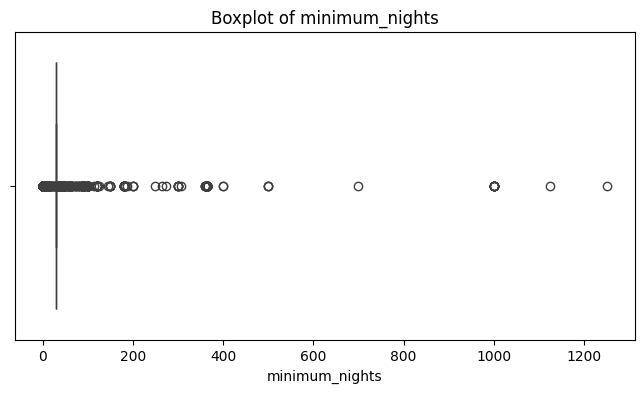

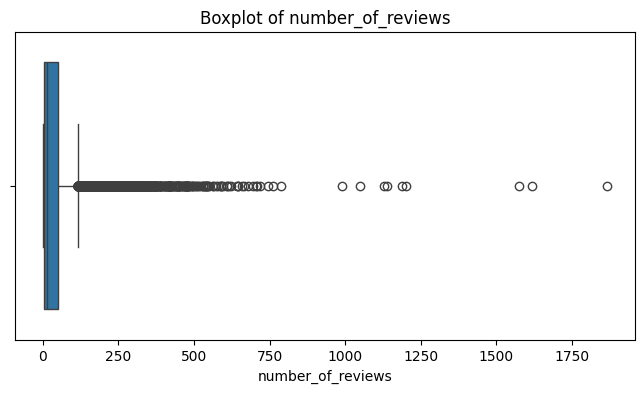

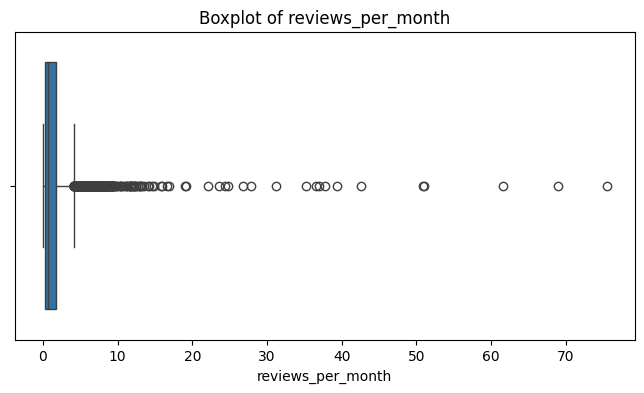

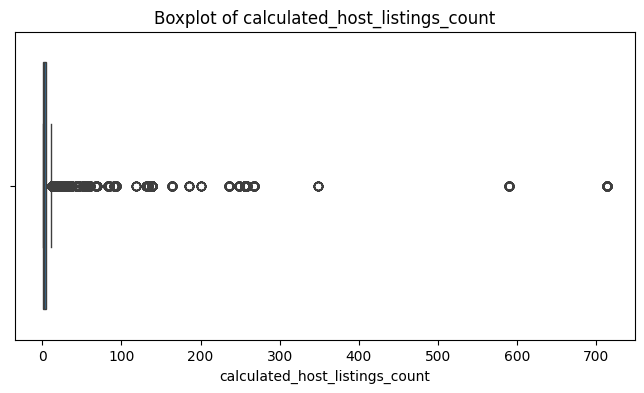

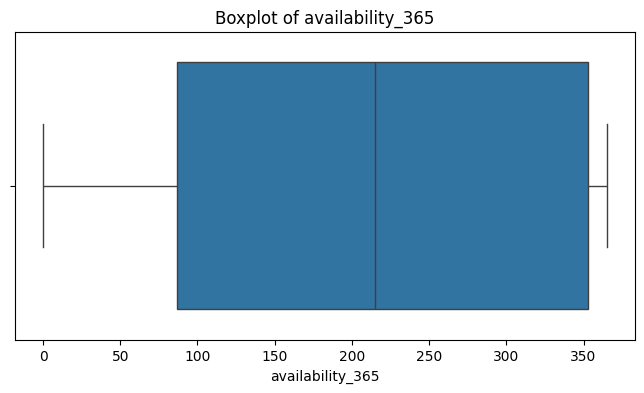

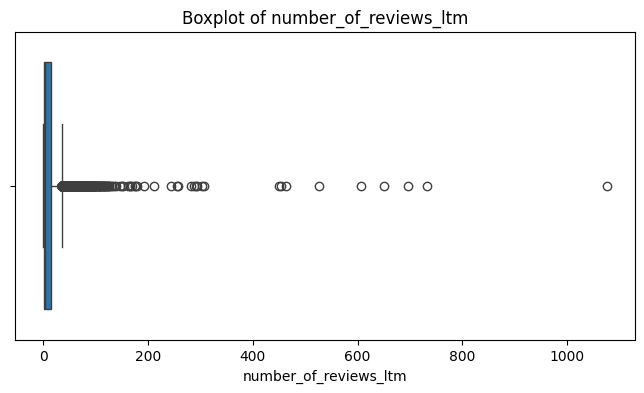

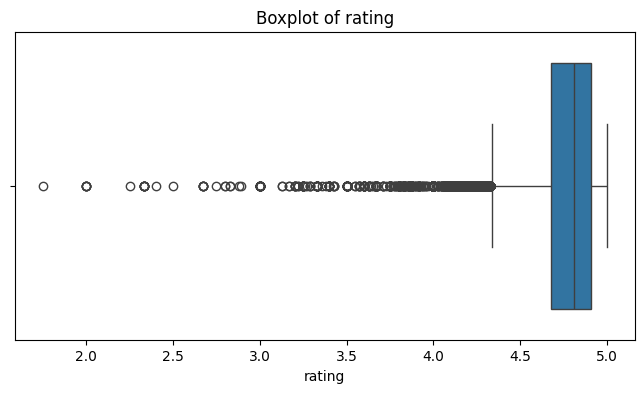

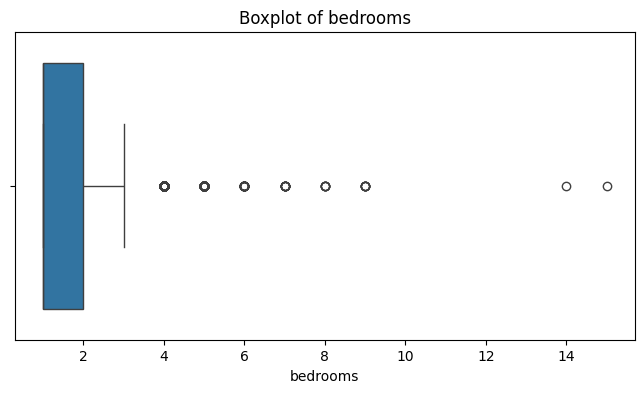

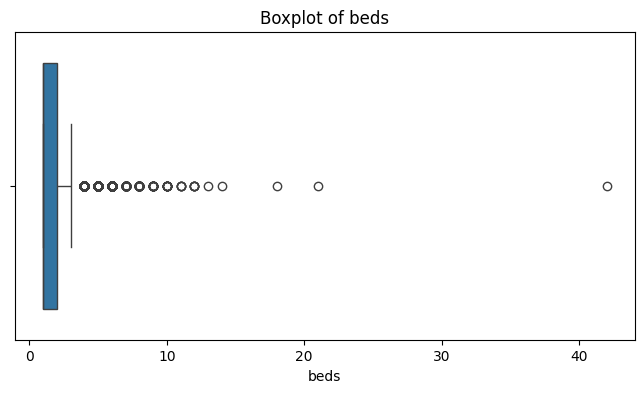

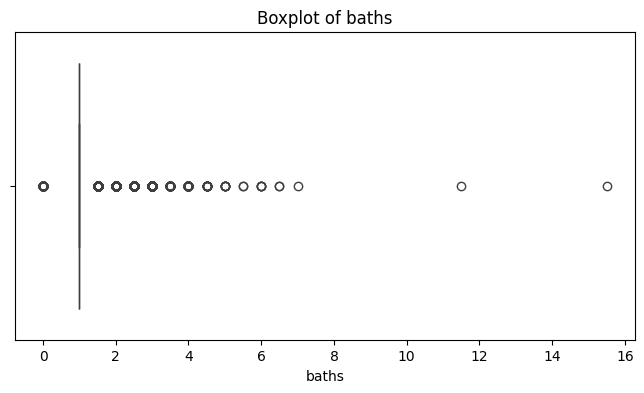

In [66]:
for col in numeric_col:
    if col not in ['id', 'host_id', 'latitude', 'longitude']:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()


In [67]:
from scipy.stats import zscore

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

z_scores = df[numeric_cols].apply(zscore)

threshold = 3

outliers = (z_scores.abs() > threshold)




The Z-score method was used to detect outliers in all numeric columns of the dataset. Any data point with a Z-score greater than ±3 was flagged as a potential outlier. This approach helps in identifying unusually high or low values that may distort analysis or modeling results.

DATA PREPARATION FOR ENCODING

In [68]:
cat_col

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review', 'license'],
      dtype='object')

In [69]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [70]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

ONE-HOT ENCODING

In [71]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['neighbourhood_group', 'room_type']

encoder = OneHotEncoder(drop='first', sparse_output=False) 

encoded_df = encoder.fit_transform(df[categorical_cols])

new_encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out(categorical_cols))

data_encoded = df.drop(columns=categorical_cols)

new_encoded_bnb_data= pd.concat([data_encoded, new_encoded_df], axis=1)

Converts categorical variables to numerical format for ML algorithms

drop='first'' prevents multicollinearity 

In [72]:
new_encoded_bnb_data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,bedrooms,beds,baths,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Clinton Hill,40.683710,-73.964610,55.0,30.0,3.0,...,1.0,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Hell's Kitchen,40.766610,-73.988100,144.0,30.0,9.0,...,2.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Chelsea,40.750764,-73.994605,187.0,2.0,6.0,...,1.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Washington Heights,40.835600,-73.942500,120.0,30.0,156.0,...,1.0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Murray Hill,40.751120,-73.978600,85.0,30.0,11.0,...,1.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20765,2.473690e+07,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Lower East Side,40.711380,-73.991560,45.0,30.0,124.0,...,1.0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20766,2.835711e+06,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Greenwich Village,40.730580,-74.000700,105.0,30.0,56.0,...,1.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20767,5.182527e+07,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Hell's Kitchen,40.757350,-73.993430,299.0,30.0,60.0,...,1.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20768,7.830000e+17,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Chinatown,40.713750,-73.991470,115.0,30.0,7.0,...,1.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


SCALING THE NUMERICAL COLUMNS


In [73]:
to_be_scaled=[i for i in numeric_col if i not in ['id','host_id','latitude','longitude']]

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_encoded_bnb_data[to_be_scaled] = scaler.fit_transform(new_encoded_bnb_data[to_be_scaled])


In [75]:
new_encoded_bnb_data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,bedrooms,beds,baths,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Clinton Hill,40.683710,-73.964610,-0.129709,0.042982,-0.538707,...,-0.500186,-0.597041,-0.370301,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Hell's Kitchen,40.766610,-73.988100,-0.042657,0.042982,-0.457087,...,0.768915,-0.597041,-0.370301,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Chelsea,40.750764,-73.994605,-0.000599,-0.792185,-0.497897,...,-0.500186,0.228066,-0.370301,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Washington Heights,40.835600,-73.942500,-0.066132,0.042982,1.542611,...,-0.500186,-0.597041,-0.370301,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Murray Hill,40.751120,-73.978600,-0.100366,0.042982,-0.429880,...,-0.500186,-0.597041,-0.370301,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Standardization ensures equal feature importance in distance-based algorithms

Preserves ID and coordinate columns that shouldn't be scaled

FEATURE ENGINEERING

FULL NEIGHBOURHOOD

In [78]:
# One-hot encoding for room_type
new_encoded_bnb_data = pd.get_dummies(df, columns=['room_type'], prefix='room')

# Combine neighborhood info
new_encoded_bnb_data['full_neighbourhood'] = new_encoded_bnb_data['neighbourhood_group'].astype(str) + " - " + new_encoded_bnb_data['neighbourhood'].astype(str)


DATE FEATURE EXTRACTION

In [80]:
if 'last_review' in new_encoded_bnb_data.columns:
    new_encoded_bnb_data['last_review'] = pd.to_datetime(new_encoded_bnb_data['last_review'], errors='coerce')

    # Now safely extract date components
    new_encoded_bnb_data['review_year'] = new_encoded_bnb_data['last_review'].dt.year
    new_encoded_bnb_data['review_month'] = new_encoded_bnb_data['last_review'].dt.month
    new_encoded_bnb_data['review_day'] = new_encoded_bnb_data['last_review'].dt.day
    new_encoded_bnb_data['review_dayofweek'] = new_encoded_bnb_data['last_review'].dt.dayofweek

C:\Users\Jesilda\AppData\Local\Temp\ipykernel_15060\2534621179.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_encoded_bnb_data['last_review'] = pd.to_datetime(new_encoded_bnb_data['last_review'], errors='coerce')


In [82]:
new_encoded_bnb_data['days_since_last_review'] = (pd.to_datetime('today') - new_encoded_bnb_data['last_review']).dt.days


PRICE CATEGORIZATION

In [92]:
new_encoded_bnb_data['price_category'] = pd.cut(new_encoded_bnb_data['price'], 
                                        bins=[0, 50, 100, 200, 500, float('inf')],
                                        labels=['Budget', 'Economy', 'Standard', 'Premium', 'Luxury'])
        

PRICE PER BED

In [86]:
new_encoded_bnb_data['price_per_bed'] = new_encoded_bnb_data['price'] / new_encoded_bnb_data['beds'].replace(0, 1)


VALUE SCORE

In [87]:
new_encoded_bnb_data['value_score'] = new_encoded_bnb_data['rating'] / new_encoded_bnb_data['price'].replace(0, np.nan)


REVIEWS_MONTHLY_RATE

In [88]:
new_encoded_bnb_data['listing_age_months'] = new_encoded_bnb_data['last_review'].sub(new_encoded_bnb_data['last_review'].min()).dt.days // 30
new_encoded_bnb_data['reviews_monthly_rate'] = new_encoded_bnb_data['number_of_reviews'] / new_encoded_bnb_data['listing_age_months'].replace(0, 1)


HOST_CATEGORY

In [90]:
new_encoded_bnb_data['host_category'] = pd.cut(
    new_encoded_bnb_data['calculated_host_listings_count'],
    bins=[0, 1, 5, 100],
    labels=['Solo Host', 'Small Business', 'Power Host']
)


DISTANCE FROM CITY

In [95]:
from geopy.distance import geodesic
city_center = (40.7128, -74.0060)  # Example: NYC center
new_encoded_bnb_data['dist_from_center'] = new_encoded_bnb_data.apply(
    lambda row: geodesic(city_center, (row['latitude'], row['longitude'])).km if pd.notnull(row['latitude']) else None,
    axis=1
)


TEXT FEATURE ENGINEERING

In [93]:
new_encoded_bnb_data['title_word_count'] = new_encoded_bnb_data['name'].fillna("").str.split().apply(len)


BEDROOM CATEGORIZATION

In [94]:
new_encoded_bnb_data['bedroom_category'] = pd.cut(new_encoded_bnb_data['bedrooms'],
                                          bins=[-1, 0, 1, 2, 4, float('inf')],
                                          labels=['Studio', 'One_BR', 'Two_BR', 'Multi_BR', 'Large_Property'])
        

LUXURY PROPERTY DETECTION

In [96]:
luxury_keywords = ['luxury', 'deluxe', 'premium', 'executive', 'suite', 'penthouse']
new_encoded_bnb_data['is_luxury'] = new_encoded_bnb_data['name'].fillna('').str.lower().str.contains('|'.join(luxury_keywords)).astype(int)
            

HAS_LICENSE_FLAG

In [102]:
df['has_license_flag'] = df['license'].notnull().astype(int)


RATING CATEGORIZATION

In [97]:
new_encoded_bnb_data.rating.nunique()

160

In [98]:
new_encoded_bnb_data['rating_category'] = pd.cut(
    new_encoded_bnb_data['rating'],
    bins=[0, 3, 4, 4.5, 5],
    labels=['Poor', 'Good', 'Very_Good', 'Excellent'])

## 🔍 Airbnb Feature Engineering Additions (14 Features)

---

### 1. `full_neighbourhood`
- 🧠 **What it does:** Combines `neighbourhood_group` and `neighbourhood` for more granular location analysis.
- 💼 **Business Use:** Enables pricing or occupancy trend analysis at hyper-local levels.
- ✅ **Problem Solved:** Helps Airbnb tailor pricing & marketing strategies per area.

---

### 2. `review_year`, `review_month`, `review_day`, `review_dayofweek`
- 🧠 **What it does:** Extracts temporal review trends.
- 💼 **Business Use:** Analyze seasonality.
- ✅ **Problem Solved:** Supports promotional planning during peak review months or days.

---

### 3. `days_since_last_review`
- 🧠 **What it does:** Measures recency of guest engagement.
- 💼 **Business Use:** Flags inactive listings → inform reactivation efforts or audits.
- ✅ **Problem Solved:** Helps identify declining or abandoned listings.

---

### 4. `price_category`
- 🧠 **What it does:** Bins prices into categories like Budget, Luxury, etc.
- 💼 **Business Use:** Understand customer segments → market segmentation.
- ✅ **Problem Solved:** Helps compare  listings and optimize pricing strategy.

---

### 5. `price_per_bed`
- 🧠 **What it does:** Normalizes price based on beds.
- 💼 **Business Use:** Offers more realistic affordability metrics to guests.
- ✅ **Problem Solved:** Solves mispricing due to unit size discrepancies.

---

### 6. `value_score = rating / price`
- 🧠 **What it does:** Captures cost-performance ratio.
- 💼 **Business Use:** Identify high-value listings to promote or replicate.
- ✅ **Problem Solved:** Maximizes guest satisfaction by surfacing good deals.

---

### 7. `listing_age_months` & `reviews_monthly_rate`
- 🧠 **What it does:** Shows how quickly a listing accumulates reviews over time.
- 💼 **Business Use:** Spot high-performing new listings early.
- ✅ **Problem Solved:** Supports ranking & promotional decisions.

---

### 8. `host_category`
- 🧠 **What it does:** Categorizes hosts by listing count.
- 💼 **Business Use:** Tailor communications.
- ✅ **Problem Solved:** Enables host-focused growth and risk mitigation.

---

### 9. `dist_from_center`
- 🧠 **What it does:** Calculates distance to city center.
- 💼 **Business Use:** Model price vs. location elasticity.
- ✅ **Problem Solved:** Allows better location-based pricing & positioning.

---

### 10. `title_word_count`
- 🧠 **What it does:** Measures how descriptive the listing title is.
- 💼 **Business Use:** Improve CTR by guiding hosts to optimize titles.
- ✅ **Problem Solved:** Increases booking conversion via better marketing copy.

---

### 11. `bedroom_category`
- 🧠 **What it does:** Groups listings by bedroom count.
- 💼 **Business Use:** Analyze performance trends across property types.
- ✅ **Problem Solved:** Informs inventory planning (e.g. shortage of studios).

---

### 12. `is_luxury` (via keyword detection)
- 🧠 **What it does:** Flags properties with “luxury” marketing terms.
- 💼 **Business Use:** Test if luxury keywording boosts price or rating.
- ✅ **Problem Solved:** Identifies upscale listings for premium targeting.

---

### 13. `has_license_flag`
- 🧠 **What it does:** Indicates compliance with legal regulations.
- 💼 **Business Use:** Ensure hosts meet regulatory criteria → avoid fines.
- ✅ **Problem Solved:** Compliance tracking and enforcement.

---

### 14. `rating_category`
- 🧠 **What it does:** Simplifies raw ratings into labels (e.g., Good, Excellent).
- 💼 **Business Use:** Benchmark listings and incentivize improvements.
- ✅ **Problem Solved:** Makes guest satisfaction tracking actionable.


In [103]:
new_encoded_bnb_data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,value_score,listing_age_months,reviews_monthly_rate,host_category,price_category,title_word_count,bedroom_category,dist_from_center,is_luxury,rating_category
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,55.0,30.0,...,0.090909,51,0.058824,Solo Host,Economy,9,One_BR,4.761589,0,Excellent
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,144.0,30.0,...,0.032431,136,0.066176,NaN,Standard,16,Two_BR,6.163847,0,Excellent
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,187.0,2.0,...,0.022299,148,0.040541,Solo Host,Standard,16,One_BR,4.324302,0,Very_Good


In [108]:
new_encoded_bnb_data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'rating', 'bedrooms', 'beds',
       'baths', 'room_Entire home/apt', 'room_Hotel room', 'room_Private room',
       'room_Shared room', 'full_neighbourhood', 'review_year', 'review_month',
       'review_day', 'review_dayofweek', 'days_since_last_review',
       'price_per_bed', 'value_score', 'listing_age_months',
       'reviews_monthly_rate', 'host_category', 'price_category',
       'title_word_count', 'bedroom_category', 'dist_from_center', 'is_luxury',
       'rating_category'],
      dtype='object')

In [107]:
print(f"Final dataset dimensions: {new_encoded_bnb_data.shape}")
print(f"Total features created: {new_encoded_bnb_data.shape[1] - df.shape[1]} new features")


Final dataset dimensions: (20770, 42)
Total features created: 15 new features


THIS IS THE FINAL CLEANED DATASET

## 📊INSIGHTS SUMMARY:

1. Most listings are 1-2 bedroom properties, indicating a market focused on individual travelers and small groups
2. Entire homes/apartments are most common, followed by private rooms.
3. Most properties are budget to mid-range, with a long tail of luxury properties
4. Ratings heavily skewed toward higher scores , indicating high service quality
5. Most properties are available throughtout whereas some are not available at all (0 and 365 have the highest values).
6. Most properties have lesser number of bedrooms , while very few have a large number of bedrooms.
7. Most properties have lesser number of beds , while very few have a large number of beds.
8. Most properties have lesser number of baths , while very few have a large number of baths.
9. Manhattan has the highest number of listings followed by Brooklyn and Queens.
10. The outliers in most columns can be seen as luxury listings having a larger price quote and more bedrooms,beds and baths.
11. Creating new features like review_year,review_month, price_category, is_luxury,rating_category can be effective while modelling.
12. Room Type Heavily Influences Pricing
13. Location Greatly Affects Price
14. Price Correlates with Reviews
15. Categorized Bedroom Counts Improve Filtering & Demand Matching
